Transform the WOD data files into 2 netCDF (one for T, one for S) storing only the observations (i.e. coordinates, field value and observations ID's).

In [1]:
using NCDatasets
using PhysOcean
using DIVAnd
using PyPlot

In [2]:
woddatadir = "/data/SeaDataCloud/NorthSea/WOD/"
varname1 = "Temperature"
varname2 = "Salinity"
obsfile1 = joinpath(woddatadir, "northsea_obs_wod_temperature.nc")
obsfile2 = joinpath(woddatadir, "northsea_obs_wod_salinity.nc")

"/data/SeaDataCloud/NorthSea/WOD/northsea_obs_wod_salinity.nc"

In [3]:
@time obsvalwod,obslonwod,obslatwod,obsdepthwod,obstimewod,obsidwod = 
WorldOceanDatabase.load(Float64,woddatadir,varname1,prefixid = "1977-");

┌ Warning: no file starting with ocldb found in directory /data/SeaDataCloud/NorthSea/WOD/NativeLevels
└ @ PhysOcean.WorldOceanDatabase /home/ctroupin/.julia/packages/PhysOcean/E3hd9/src/WorldOceanDatabase.jl:500
┌ Warning: no file starting with ocldb found in directory /data/SeaDataCloud/NorthSea/WOD/WOD_Collection_2019-07-08T11-45-33.Data
└ @ PhysOcean.WorldOceanDatabase /home/ctroupin/.julia/packages/PhysOcean/E3hd9/src/WorldOceanDatabase.jl:500
┌ Info: Loading files from /data/SeaDataCloud/NorthSea/WOD/APB/ocldb1558431114.3020.APB.nc
└ @ PhysOcean.WorldOceanDatabase /home/ctroupin/.julia/packages/PhysOcean/E3hd9/src/WorldOceanDatabase.jl:461
┌ Info: Loading files from /data/SeaDataCloud/NorthSea/WOD/CTD/ocldb1558431114.3020.CTD.nc
└ @ PhysOcean.WorldOceanDatabase /home/ctroupin/.julia/packages/PhysOcean/E3hd9/src/WorldOceanDatabase.jl:461
┌ Info: Loading files from /data/SeaDataCloud/NorthSea/WOD/GLD/ocldb1558431114.3020.GLD.nc
└ @ PhysOcean.WorldOceanDatabase /home/ctroupin/.julia

NCDatasets.NetCDFError: NCDatasets.NetCDFError(-51, "Opening path /data/SeaDataCloud/NorthSea/WOD/StandardLevels/ocldb1560607016.643.CTD: NetCDF: Unknown file format")

In [4]:
@time obsvalwod2,obslonwod2,obslatwod2,obsdepthwod2,obstimewod2,obsidwod2 = 
WorldOceanDatabase.load(Float64,woddatadir,varname2,prefixid = "1977-");

┌ Info: Loading files from /data/SeaDataCloud/NorthSea/WOD/APB/ocldb1558431114.3020.APB.nc
└ @ PhysOcean.WorldOceanDatabase /home/ctroupin/.julia/packages/PhysOcean/E3hd9/src/WorldOceanDatabase.jl:461
┌ Info: Loading files from /data/SeaDataCloud/NorthSea/WOD/CTD/ocldb1558431114.3020.CTD.nc
└ @ PhysOcean.WorldOceanDatabase /home/ctroupin/.julia/packages/PhysOcean/E3hd9/src/WorldOceanDatabase.jl:461
┌ Info: Loading files from /data/SeaDataCloud/NorthSea/WOD/GLD/ocldb1558431114.3020.GLD.nc
└ @ PhysOcean.WorldOceanDatabase /home/ctroupin/.julia/packages/PhysOcean/E3hd9/src/WorldOceanDatabase.jl:461
┌ Info: Loading files from /data/SeaDataCloud/NorthSea/WOD/OSD/ocldb1558431114.3020.OSD.nc
└ @ PhysOcean.WorldOceanDatabase /home/ctroupin/.julia/packages/PhysOcean/E3hd9/src/WorldOceanDatabase.jl:461
┌ Info: Loading files from /data/SeaDataCloud/NorthSea/WOD/PFL/ocldb1558431114.3020.PFL.nc
└ @ PhysOcean.WorldOceanDatabase /home/ctroupin/.julia/packages/PhysOcean/E3hd9/src/WorldOceanDatabase.jl

 71.064219 seconds (177.30 M allocations: 24.716 GiB, 12.86% gc time)


In [9]:
DIVAnd.saveobs(obsfile1,varname1,obsvalwod,
    (obslonwod, obslatwod, obsdepthwod, obstimewod),obsidwod);

In [10]:
DIVAnd.saveobs(obsfile2,varname2,obsvalwod2,
    (obslonwod2, obslatwod2, obsdepthwod2, obstimewod2),obsidwod2);

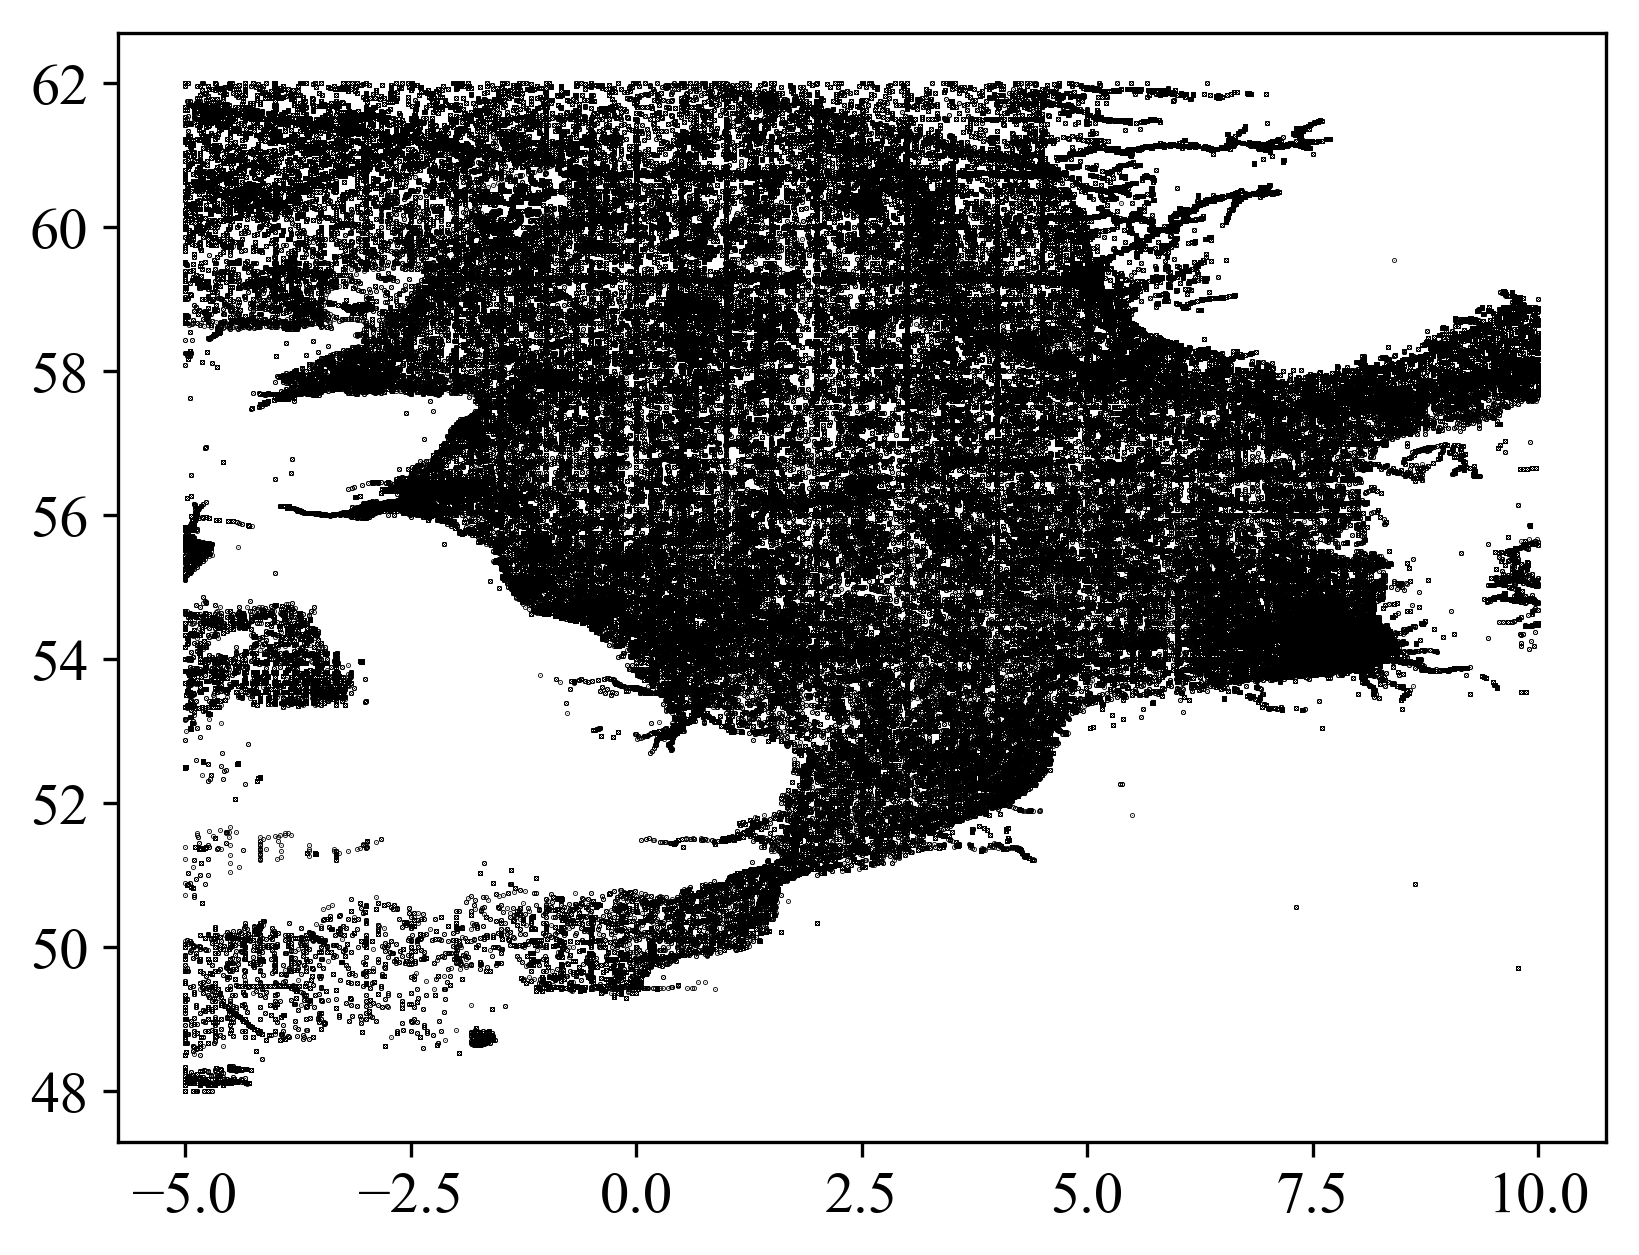

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7ff364e5e278>

In [11]:
PyPlot.plot(obslonwod, obslatwod, "ko", markersize=0.2)